<a href="https://colab.research.google.com/github/cr21/Unsupervised-Machine-Learning-Clustering/blob/main/Copy_of_GaussianMixuerModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/Dataset/

/content/drive/MyDrive/Dataset


In [3]:
import numpy as np
from sklearn.datasets import make_spd_matrix
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [4]:
gaussian2D = np.loadtxt('2gaussian.txt')
featureSize = gaussian2D.shape[1]
featureSize

2

In [5]:

# initialize Mean
means = np.random.rand(2,2)
# mean = mean.tolist()


# initialize Covariance matrix
CovarianceMatrix = []
for j in range(len(means)):
  CovarianceMatrix.append(make_spd_matrix(2))
CovarianceMatrix



# intialize Weights of cluster
# prior distrution dirichlet 
weights = np.random.dirichlet(np.ones(2),size=1)
weights = weights.reshape((2,))

In [6]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']

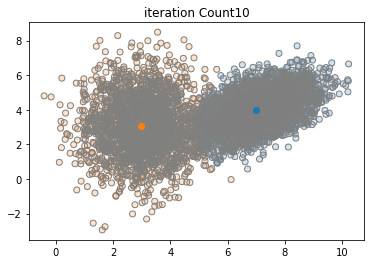

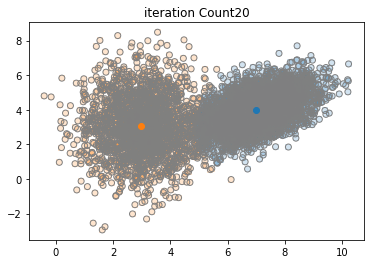

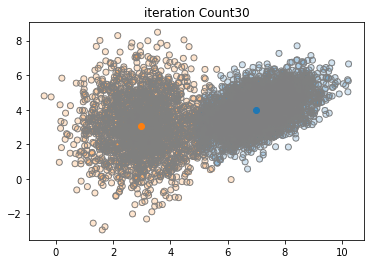

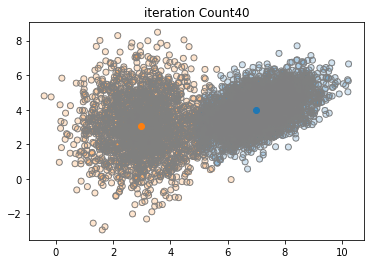

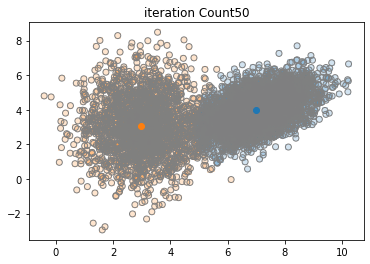

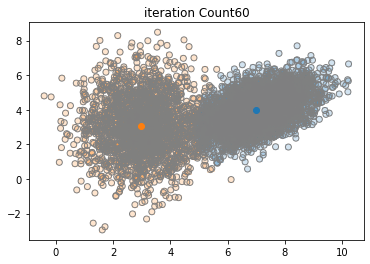

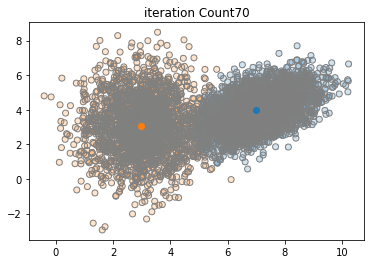

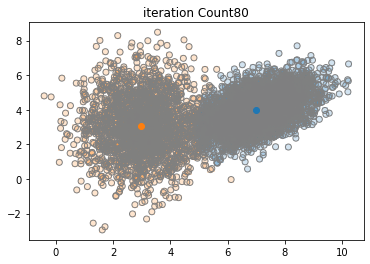

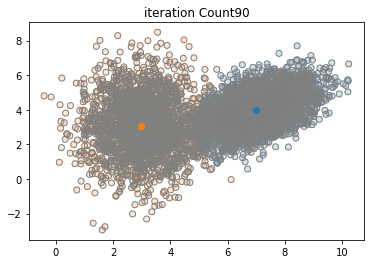

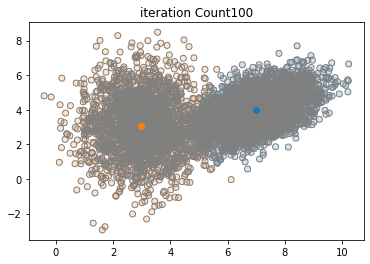

In [9]:
k = 2
STEP_SIZE = 0

while STEP_SIZE < 100 :

  STEP_SIZE += 1

  # E step
  MLE = []
  for num  in range(k):
    # get Probability of X given Mean and Covariance  for each cluter
    pdf  = multivariate_normal.pdf(gaussian2D, mean = means[num], cov= CovarianceMatrix[num])
    MLE.append(pdf)

  MLE = np.array(MLE)
  # testing it should be (2, 6000)
  # assert MLE.shape == (k, len(gaussian2D))
  # below work is for plotting
  predictions = np.argmax(MLE, axis=0)
    
  if (STEP_SIZE % 10 == 0) :
    plot(gaussian2D, k, predictions, STEP_SIZE,means)
  PI_K = []
  # M Step
  
  for j in range(k) :
    # Normalize the probablity and calculate the PI_K
    PI_K.append( MLE[j] * weights[j]/  (np.sum([ weights[i] * MLE[i] for i in  range(k)], axis=0) + 10e-5))
    # updated mean covariance and weights
    means[j] = np.sum(PI_K[j].reshape(len(gaussian2D),1) * gaussian2D, axis= 0 ) / (np.sum(PI_K[j] + 10e-5))
    numerator = np.dot ( (PI_K[j].reshape(len(gaussian2D),1) *  (gaussian2D - means[j])).T , (gaussian2D - means[j]) )
    denom =   np.sum(PI_K[j]  + 10e-5)
    CovarianceMatrix[j] = numerator/denom
    weights[j] = np.mean(PI_K[j])
  # print(STEP_SIZE)
   



In [7]:
def plot(gaussian2D, k,predictions , iter, means):
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
  for c in range(k):
    pred_ids = np.where(predictions == c)
    plt.scatter(gaussian2D[pred_ids[0],0], gaussian2D[pred_ids[0],1], color=colors[c],  alpha=0.2, edgecolors='none', marker='s')
  
  plt.scatter(gaussian2D[...,0], gaussian2D[...,1], facecolors='none', edgecolors='grey')
  
  for j in range(k):
    plt.scatter(means[j][0], means[j][1], color=colors[j])
    

  plt.title("iteration Count" + str(iter))
  plt.show()

In [10]:
for j in range(k):
  print("______________")
  print(" Cluster number : ", j)
  print("means ")
  print(means[j])
  print("Covariance matrix ")
  print(CovarianceMatrix[j])
  print("weights :")
  print(weights[j])
  print("____________________")

______________
 Cluster number :  0
means 
[7.00874082 3.98084875]
Covariance matrix 
[[0.97119872 0.4947484 ]
 [0.4947484  0.99046956]]
weights :
0.6629640747487081
____________________
______________
 Cluster number :  1
means 
[2.99473288 3.05159425]
Covariance matrix 
[[0.97380622 0.01939746]
 [0.01939746 2.81077589]]
weights :
0.3283192267584078
____________________


In [11]:
gaussian3D = np.loadtxt('3gaussian.txt')
featureSize = gaussian3D.shape[1]
featureSize

2

In [12]:

# initialize Mean
means3d = np.random.rand(3,2)
# mean = mean.tolist()


# initialize Covariance matrix
CovarianceMatrix3d = []
for j in range(len(means3d)):
  CovarianceMatrix3d.append(make_spd_matrix(2, j+ 42))
CovarianceMatrix3d



# intialize Weights of cluster
# prior distrution dirichlet 
weights3d = np.random.dirichlet(np.ones(3),size=1)
weights3d = weights3d.reshape((3,))

In [13]:
CovarianceMatrix3d

[array([[2.09417602, 0.34617642],
        [0.34617642, 0.21783715]]), array([[2.28664883, 0.76798353],
        [0.76798353, 0.89962772]]), array([[ 1.91873603, -0.909318  ],
        [-0.909318  ,  1.04981319]])]

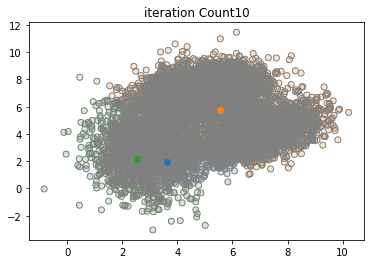

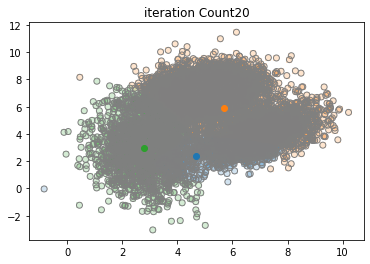

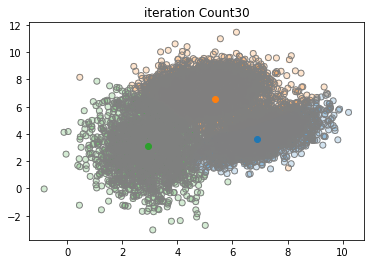

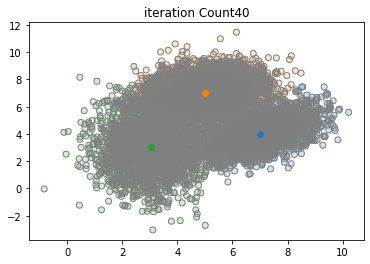

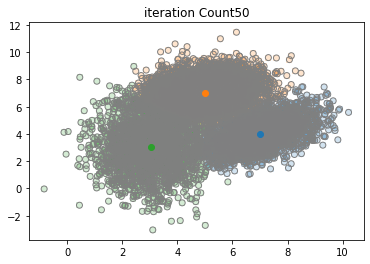

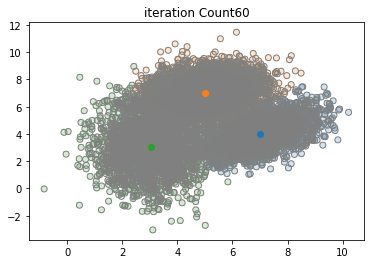

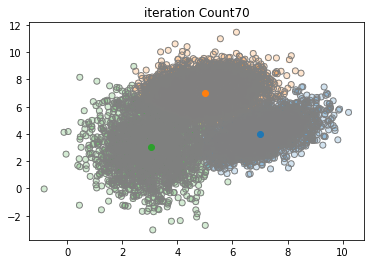

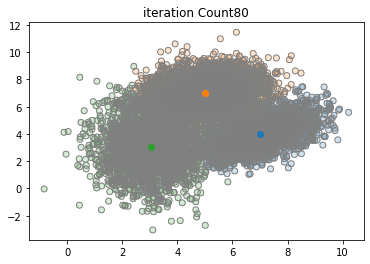

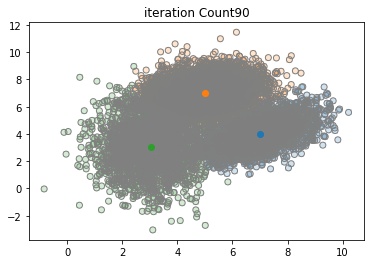

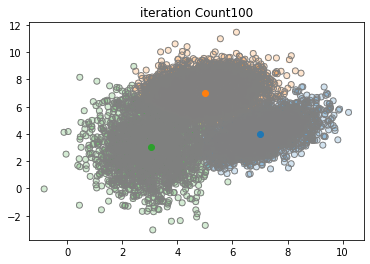

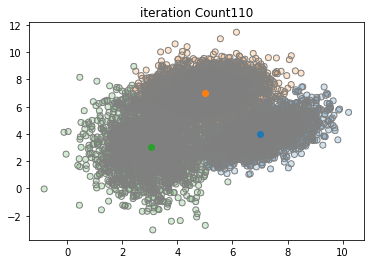

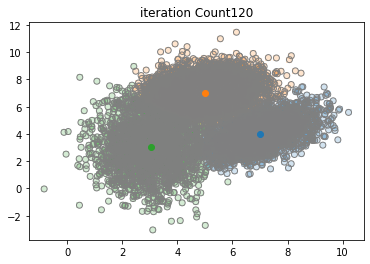

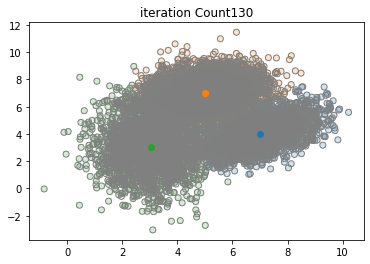

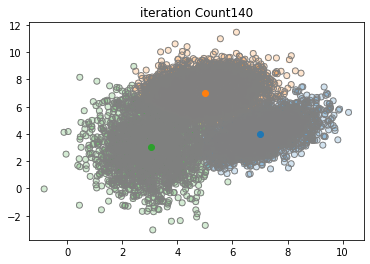

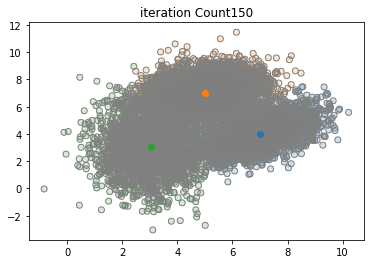

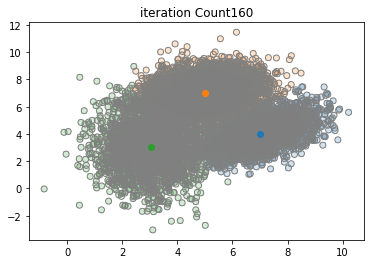

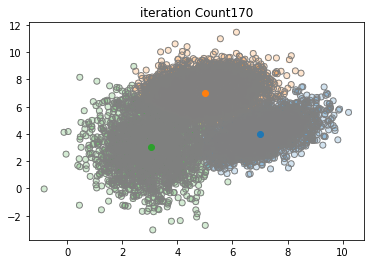

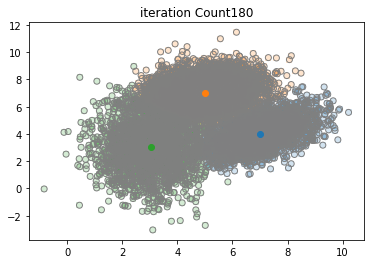

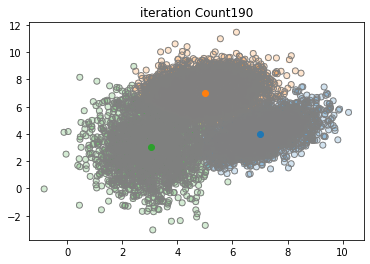

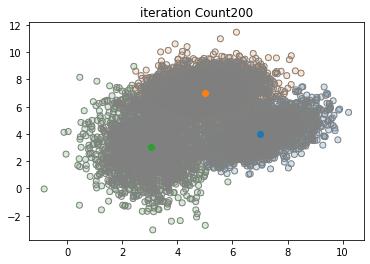

In [14]:
k = 3
STEP_SIZE = 0

while STEP_SIZE < 200 :

  STEP_SIZE += 1

  # E step
  MLE3d = []
  for num  in range(k):
    # get Probability of X given Mean and Covariance  for each cluter
    pdf  = multivariate_normal.pdf(gaussian3D, mean = means3d[num], cov= CovarianceMatrix3d[num])
    MLE3d.append(pdf)

  MLE3d = np.array(MLE3d)
  # testing it should be (2, 6000)
  # assert MLE.shape == (k, len(gaussian2D))
  predictions3d = np.argmax(MLE3d, axis=0)
  PI_K = []
  # plot every 10th iteration
  if(STEP_SIZE %10 == 0):
    plot(gaussian3D, 3, predictions3d, STEP_SIZE, means3d)
  # M Step
  
  for j in range(k) :
    # Normalize the probablity and calculate the PI_K
    PI_K.append( MLE3d[j] * weights3d[j]/  (np.sum([ weights3d[i] * MLE3d[i] for i in  range(k)], axis=0) + 10e-5))
    # np.sum(PI_K.reshape(len(gaussian2D),1) * X, axis=0) / (np.sum(b[j]+eps))
    means3d[j] = np.sum(PI_K[j].reshape(len(gaussian3D),1) * gaussian3D, axis= 0 ) / (np.sum(PI_K[j] + 10e-5))
    numerator = np.dot ( (PI_K[j].reshape(len(gaussian3D),1) *  (gaussian3D - means3d[j])).T , (gaussian3D - means3d[j]) )
    denom =   np.sum(PI_K[j]  + 10e-5)
    CovarianceMatrix3d[j] = numerator/denom
    weights3d[j] = np.mean(PI_K[j])
  # print(STEP_SIZE)
   



In [15]:
for j in range(k):
  print("______________")
  print(" Cluster number : ", j)
  print("means ")
  print(means3d[j])
  print("Covariance matrix ")
  print(CovarianceMatrix3d[j])
  print("weights :")
  print(weights3d[j])
  print("____________________")

______________
 Cluster number :  0
means 
[7.01015634 4.01128267]
Covariance matrix 
[[0.98363366 0.49709061]
 [0.49709061 0.97900783]]
weights :
0.29661434318115776
____________________
______________
 Cluster number :  1
means 
[5.00415077 6.99207789]
Covariance matrix 
[[0.97325097 0.18359831]
 [0.18359831 0.95314011]]
weights :
0.49446231966786364
____________________
______________
 Cluster number :  2
means 
[3.03687463 3.03650199]
Covariance matrix 
[[0.97633032 0.03272165]
 [0.03272165 3.16993496]]
weights :
0.19869003095395574
____________________


In [16]:
# MSIST
# NG
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_cosine_distances
from sklearn.metrics.pairwise import paired_manhattan_distances
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics.pairwise import  cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
def load_fashionData():
  # Load Fashion Mnist dataset
  fashion_mnist = tf.keras.datasets.fashion_mnist

  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  # our train data is images (28*28) we need to flatten it
  flatten_train_images = []
  for image in train_images:
    flatten_train_images.append(image.flatten())

  # convert in numpy array
  flatten_train_images = np.array(flatten_train_images)
  # normalize images
  flatten_train_images = flatten_train_images / 255


  # our test data is images (28*28) we need to flatten it
  flatten_test_images = []
  for image in test_images:
    flatten_test_images.append(image.flatten())

  # convert in numpy array
  flatten_test_images = np.array(flatten_test_images)
  # normalize images
  flatten_test_images = flatten_test_images / 255

  # combine test and train data
  # fshn_mnist_data =  np.concatenate((flatten_train_images, flatten_test_images), axis = 0)
  # fshn_mnist_labels = np.concatenate((train_labels, test_labels), axis = 0)

  return flatten_train_images, train_labels, flatten_test_images, test_labels


In [18]:
# Run Kmeans on Fashion MNIST data
fashionData, fashionLabel, flatten_test_images, test_labels = load_fashionData()

4423680/4422102 [==============================] - 0s 0us/step


In [19]:

from sklearn import mixture

In [20]:
k_list = [5,10,15]
for k in k_list:

  gmm = mixture.GaussianMixture(n_components=k, covariance_type='diag')
  gmm.fit(fashionData, fashionLabel)
  y_pred = gmm.predict(flatten_test_images)
  print("k ", k)
  print("AIC metric on train fashion data", gmm.aic(fashionData))
  print("AIC metric on test fashion data", gmm.aic(flatten_test_images)) 
  from sklearn.metrics import accuracy_score
  acc = accuracy_score(test_labels, y_pred)
  print("accuracy", acc)

k  5
AIC metric on train fashion data -133280408.00085159
AIC metric on test fashion data -21937433.09008749
accuracy 0.0745
k  10
AIC metric on train fashion data -169000280.4726977
AIC metric on test fashion data -28053767.25667585
accuracy 0.1969
k  15
AIC metric on train fashion data -187174428.90100342
AIC metric on test fashion data -30937748.060461544
accuracy 0.0574


In [21]:
def loadSpamData(fileName = 'spambase.data') :
  data = []
  labels = []
  with open(fileName,'r') as f:
    dataset = f.readlines()
    for line in dataset:
      arr = line.split(",")
      data.append(arr[:-1])
      labels.append(arr[-1])
  data = np.array(data).astype(np.float)
  labels = np.array(labels).astype(np.float)
  
  return data, labels




In [22]:
data, labels = loadSpamData('spambase.data')

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.3, random_state = 41)

In [24]:
k_list = [1,2,3]
for k in k_list:

  gmm = mixture.GaussianMixture(n_components=k, covariance_type='diag')
  gmm.fit(X_train, Y_train)
  y_pred = gmm.predict(X_test)
  print("k ", k)
  print("AIC metric on train on spam data", gmm.aic(X_train))
  print("AIC metric on test spam data", gmm.aic(X_test)) 
  from sklearn.metrics import accuracy_score
  acc = accuracy_score(Y_test, y_pred)
  print("accuracy spam data", acc)

k  1
AIC metric on train on spam data 360537.33926029725
AIC metric on test spam data 166413.93072439783
accuracy spam data 0.5937726285300506
k  2
AIC metric on train on spam data 18089.1618735537
AIC metric on test spam data 174182.94618741158
accuracy spam data 0.7306299782766111
k  3
AIC metric on train on spam data -110851.22143822048
AIC metric on test spam data 99276.74655268993
accuracy spam data 0.5438088341781318


In [ ]:
# https://www.python-course.eu/expectation_maximization_and_gaussian_mixture_models.php
# https://towardsdatascience.com/gaussian-mixture-models-gmm-6e95cbc38e6e